In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
columns = ['id_items', 'Nombre', 'caloria porcion','categoria']
datafile = "https://raw.githubusercontent.com/matiasch11/menu_semanal/master/calorias_comida.csv"
data = pd.read_csv(datafile, sep=';', header =0, names=columns, encoding='latin-1', index_col = 0)
data.head(10)

,Nombre,caloria porcion,categoria
id_items,,,
4,Ensalada de col con queso,150,Verduras
5,Ensalada de tomate y pimiento asado,205,Verduras
12,Ensalada de Lechuga Romana,67,Verduras
25,Ensalada con tomates cherry,180,Verduras
27,Ensalada de brócoli con frutos secos,290,Verduras
34,Ensalada de lechuga con pollo y queso,460,Combinados
47,Ensalada de berros con tomate,70,Verduras
51,Ensalada de arroz con judias verdes,140,carbohidratos
80,Ensalada de manzana verde con apio,100,Verduras


In [3]:
data['caloria porcion'].describe()

count    407.000000
mean     293.380835
std      152.941584
min       45.000000
25%      180.000000
50%      276.000000
75%      361.500000
max      980.000000
Name: caloria porcion, dtype: float64

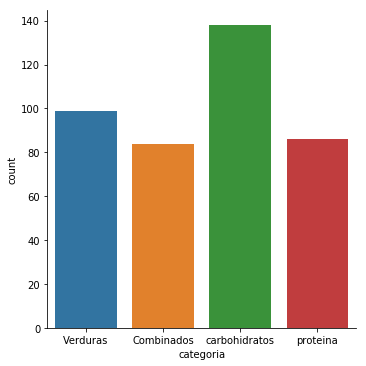

In [4]:
sns.catplot(x='categoria', data=data, kind='count')

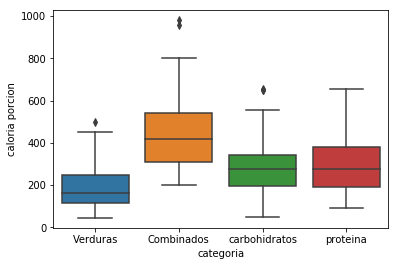

In [5]:
ax = sns.boxplot(x='categoria', y='caloria porcion', data=data)

### Reviso los outlier para verificar que sean datos correctos

In [6]:
data[(data['caloria porcion']>600)& (data['categoria']=='carbohidratos')]

,Nombre,caloria porcion,categoria
id_items,,,
1752,Raviolis con salsa de nueces,649,carbohidratos
1844,Ñoquis a la romana,650,carbohidratos
2016,Bolitas de arroz rellenas de queso,655,carbohidratos


In [7]:
data[(data['caloria porcion']>800)& (data['categoria']=='Combinados')]

,Nombre,caloria porcion,categoria
id_items,,,
696,Potaje de lentejas,980,Combinados
1749,Pizza Napolitana tradicional,956,Combinados


In [8]:
data[(data['caloria porcion']>450)& (data['categoria']=='Verduras')]

,Nombre,caloria porcion,categoria
id_items,,,
2434,Tortilla de rúcula,500,Verduras


# Datos de la Encuesta

In [9]:
def load_data_encuesta():
    data_root= "https://raw.githubusercontent.com/matiasch11/menu_semanal/master/Encuesta_vf.csv"
    columns = ['user_id', 'rating', 'comida', 'comidas_id_org']   
    data_encuesta = pd.read_csv(data_root, sep=';', header =0, names=columns, encoding='latin-1', index_col = None)
    return data_encuesta

In [10]:
data_encuesta = load_data_encuesta()
data_encuesta.head()

,user_id,rating,comida,comidas_id_org
0,18,3,Ensalada de col con queso,4
1,33,1,Ensalada de col con queso,4
2,63,1,Ensalada de col con queso,4
3,64,2,Ensalada de col con queso,4
4,65,1,Ensalada de col con queso,4


In [11]:
data_encuesta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41514 entries, 0 to 41513
Data columns (total 4 columns):
user_id           41514 non-null int64
rating            41514 non-null int64
comida            41514 non-null object
comidas_id_org    41514 non-null int64
dtypes: int64(3), object(1)
memory usage: 1.3+ MB


In [12]:
data_encuesta.describe()

,user_id,rating,comidas_id_org
count,41514.000000,41514.000000,41514.000000
mean,543.462181,3.006672,1075.871658
std,311.484491,1.129906,743.430619
min,1.000000,1.000000,4.000000
25%,276.000000,2.000000,470.000000
50%,539.000000,3.000000,862.000000
75%,817.000000,4.000000,1783.000000
max,1084.000000,4.000000,2517.000000


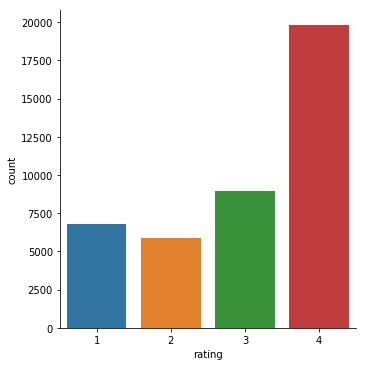

In [13]:
sns.catplot(x='rating', data=data_encuesta, kind='count')

# Análisis de ambos Dataset en conjunto

In [14]:
data_complete = data_encuesta.merge(data, left_on='comidas_id_org', right_on='id_items')
data_complete.head()

,user_id,rating,comida,comidas_id_org,Nombre,caloria porcion,categoria
0,18,3,Ensalada de col con queso,4,Ensalada de col con queso,150,Verduras
1,33,1,Ensalada de col con queso,4,Ensalada de col con queso,150,Verduras
2,63,1,Ensalada de col con queso,4,Ensalada de col con queso,150,Verduras
3,64,2,Ensalada de col con queso,4,Ensalada de col con queso,150,Verduras
4,65,1,Ensalada de col con queso,4,Ensalada de col con queso,150,Verduras


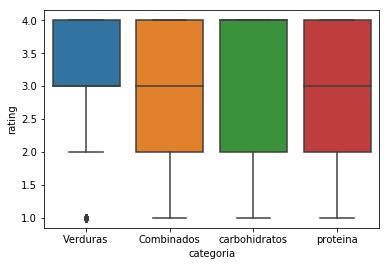

In [15]:
ax = sns.boxplot(x='categoria', y='rating', data=data_complete)

## Analisis de Correlación

### Calorias y Rating

In [16]:
rating_prom_calorias = data_complete.groupby(['caloria porcion']).agg(np.mean)

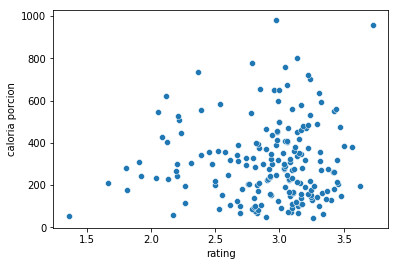

In [17]:
sns.scatterplot(data=rating_prom_calorias, x='rating', y='caloria porcion')

In [18]:
np.corrcoef(data_complete['rating'], data_complete['caloria porcion'])

array([[1.        , 0.00262279],
       [0.00262279, 1.        ]])

In [19]:
np.corrcoef(rating_prom_calorias['rating'], rating_prom_calorias.index)

array([[1.        , 0.04531991],
       [0.04531991, 1.        ]])

### Usuarios y Rating

In [20]:
rating_prom_user = data_complete.groupby(['user_id']).agg(np.mean)

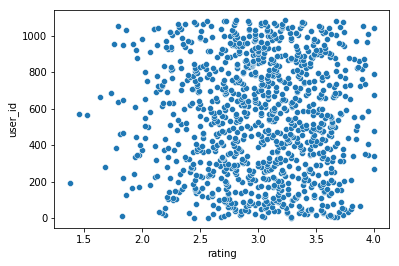

In [21]:
sns.scatterplot(data=rating_prom_user, x='rating', y='user_id')

In [22]:
np.corrcoef(data_complete['rating'], data_complete['user_id'])

array([[ 1.        , -0.00637422],
       [-0.00637422,  1.        ]])

In [23]:
np.corrcoef(rating_prom_user['rating'], rating_prom_user.index)

array([[ 1.        , -0.01207971],
       [-0.01207971,  1.        ]])